In [1]:
%matplotlib inline

# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
import seaborn as sns
style.use('ggplot') or plt.style.use('ggplot')

#from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import warnings
warnings.filterwarnings('ignore') # Configuracion warnings

# Get data

In [2]:
arrests= sm.datasets.get_rdataset("USArrests", "datasets")
arrests

<class 'statsmodels.datasets.utils.Dataset'>

In [3]:
arrests.__dict__.keys()

dict_keys(['data', '__doc__', 'package', 'title', 'from_cache', 'raw_data'])

In [4]:
arrests.title

'Violent Crime Rates by US State'

In [5]:
data = arrests.data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
data.head(2)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5


In [7]:
#N.B : we can download data from csv file, which includes in addition total column

In [8]:
df = pd.read_csv("../raw_data/crime_data_2.csv")
df.head(4)

,State,UrbanPop,Murder,Assault,Rape,Total
0,Alabama,58,13.2,236,21.2,270.4
1,Alaska,48,10.0,263,44.5,317.5
2,Arizona,80,8.1,294,31.0,333.1
3,Arkansas,50,8.8,190,19.5,218.3


In [9]:
#Let's include total column in data that we used in the previous work "notebooks/PCA%20analysis.ipynb"

In [10]:
data.head(2)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5


In [11]:
data.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [12]:
data["Total"] = data[['Murder', 'Assault', 'Rape']].sum(axis=1)
data.head(2)

,Murder,Assault,UrbanPop,Rape,Total
Alabama,13.2,236,58,21.2,270.4
Alaska,10.0,263,48,44.5,317.5


In [13]:
data = data.reset_index()
data.head(2)

,index,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5


In [14]:
data.columns = ['State', 'Murder', 'Assault', 'UrbanPop', 'Rape', 'Total']

In [15]:
data.head(2)

,State,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5


# Visualization

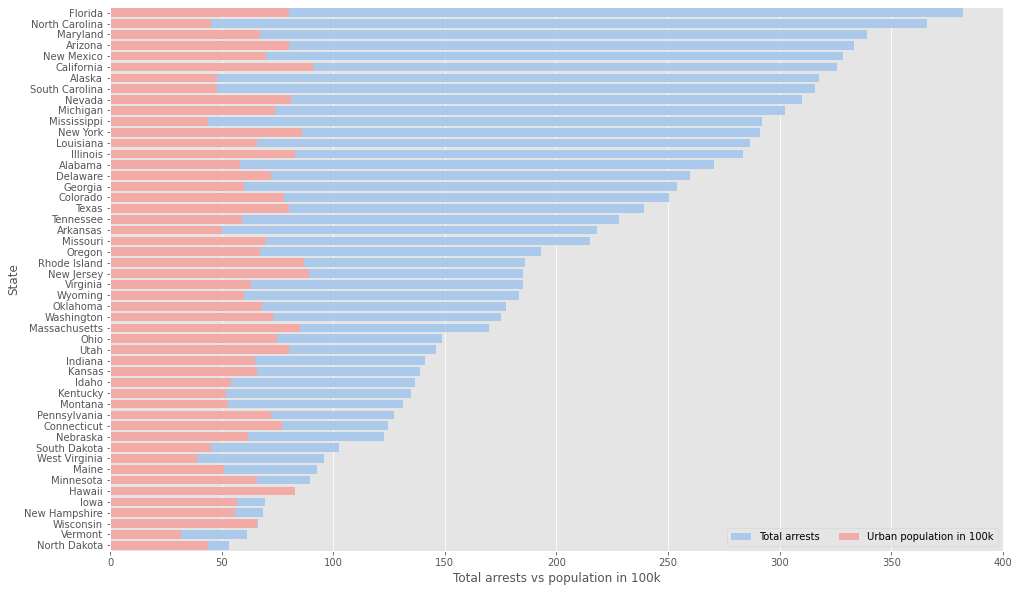

In [16]:
# Initialize the matplotlib figure

f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = data.sort_values("Total", ascending=False)

# Plot the total. x= and y= are actual column names
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="State",
            data=stats,
            label="Total arrests", 
            color="b")

# Plot the population
sns.barplot(x="UrbanPop", y="State",
            data=stats,
            label="Urban population in 100k",
            color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Total arrests vs population in 100k");

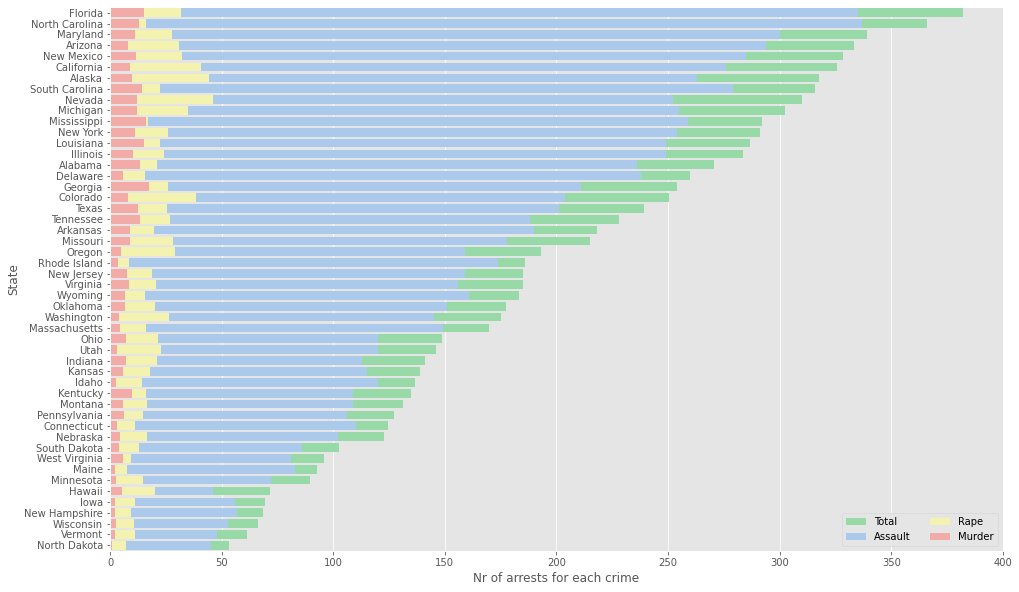

In [17]:
f, ax = plt.subplots(figsize=(16, 10))

stats = data.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="State", data=stats,
            label="Total",
            color="g")

sns.barplot(x="Assault", y="State", data=stats,
            label="Assault",
            color="b")

sns.barplot(x="Rape", y="State", data=stats,
            label="Rape",
            color="y")

sns.barplot(x="Murder", y="State", data=stats,
            label="Murder",
            color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="State",
       xlabel="Nr of arrests for each crime");

# Finding out the optimal number of clusters

In [18]:
X = data[['Murder', 'Assault', 'Rape', 'UrbanPop']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,80.085695
3,4,57.554259
4,5,50.051197
5,6,44.070226
6,7,39.279276
7,8,34.636215
8,9,31.950130
9,10,28.162977


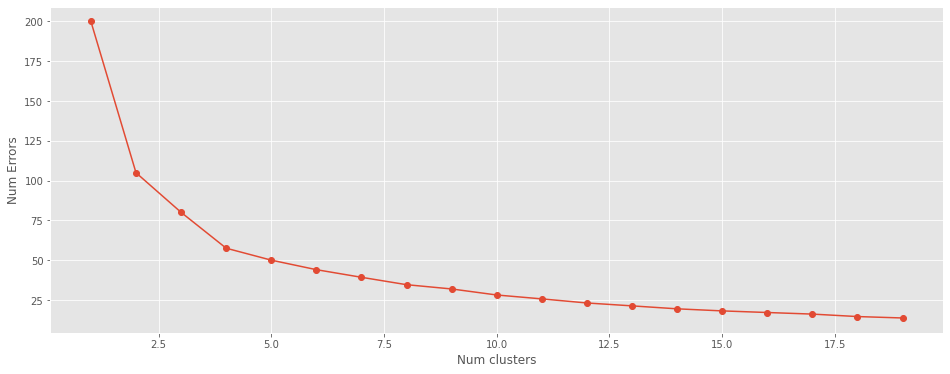

In [19]:
f, ax = plt.subplots(figsize=(16, 6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

ax.set(ylabel="Num Errors",
       xlabel="Num clusters");

Best number of clusters is 4

In [20]:
data.head(2)

,State,Murder,Assault,UrbanPop,Rape,Total
0,Alabama,13.2,236,58,21.2,270.4
1,Alaska,10.0,263,48,44.5,317.5


# K-means with n_clusters = 4

In [21]:
X = data[['Murder', 'Assault', 'Rape', 'UrbanPop']]

clusters = KMeans(n_clusters= 4)  # 4 clusters!
clusters.fit(X)
clusters.cluster_centers_
clusters.labels_

data['Crime_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['Crime_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [22]:
data.head(2)

,State,Murder,Assault,UrbanPop,Rape,Total,Crime_clusters
0,Alabama,13.2,236,58,21.2,270.4,1
1,Alaska,10.0,263,48,44.5,317.5,1


In [23]:
data.tail(2)

,State,Murder,Assault,UrbanPop,Rape,Total,Crime_clusters
48,Wisconsin,2.6,53,66,10.8,66.4,3
49,Wyoming,6.8,161,60,15.6,183.4,2


# Analyze UrbanPop Vs. Total

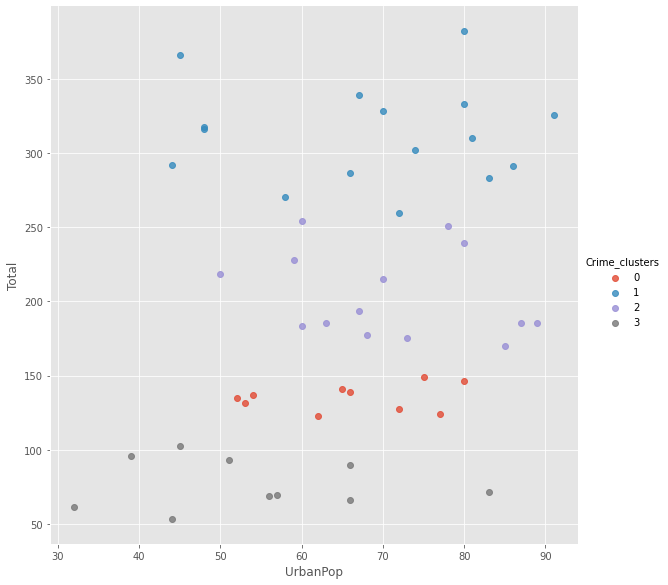

In [24]:
sns.lmplot('UrbanPop' ,'Total', data=data,
        hue = "Crime_clusters",
        fit_reg=False, size = 8);

# Analyze Murder Vs. Assault

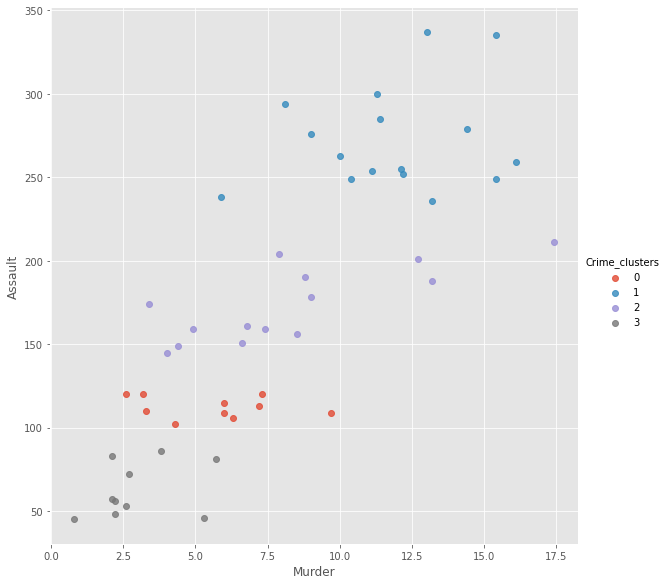

In [25]:
sns.lmplot( 'Murder','Assault',  data=data,
        hue = 'Crime_clusters',
        fit_reg=False, size = 8 );

In [26]:
X.head(2)

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48


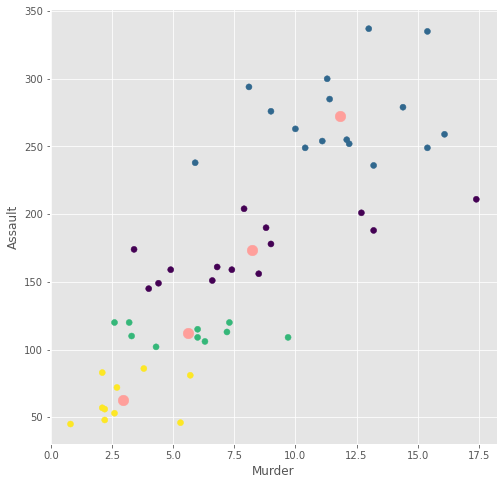

In [27]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

dt=X
clusters = KMeans(4);
clusters.fit(X);
fig, ax = plt.subplots(figsize=(8, 8))

cmap = plt.cm.get_cmap("Spectral")
labels_p = pd.Series(clusters.labels_)

centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="o", color='r', s=111)
plt.scatter(dt.iloc[:,0],dt.iloc[:,1], c= labels_p); 

ax.set(ylabel="Assault",
       xlabel="Murder");

# Analyze Murder Vs. Rape

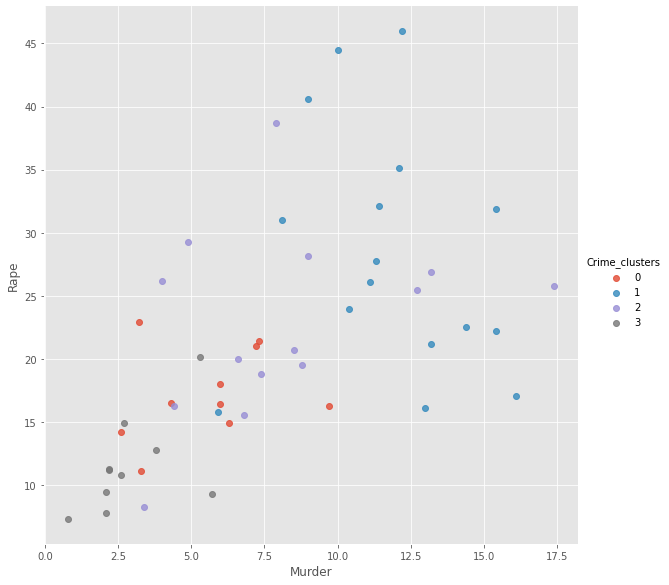

In [28]:
sns.lmplot( 'Murder','Rape',  data=data,
        hue = 'Crime_clusters',
        fit_reg=False, size = 8);

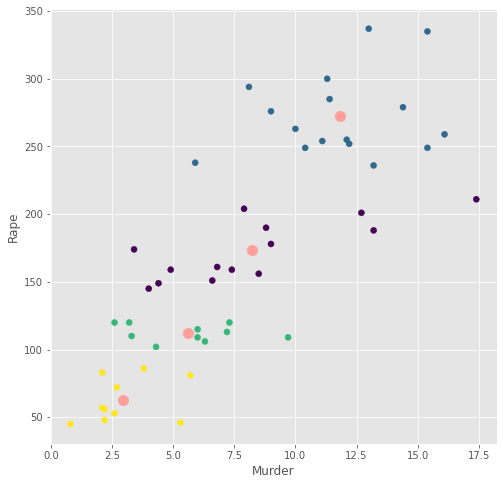

In [29]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

#dt=X
#clusters = KMeans(4);
#clusters.fit(X);
fig, ax = plt.subplots(figsize=(8, 8))

cmap = plt.cm.get_cmap("Spectral")
labels_p = pd.Series(clusters.labels_)

centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="o", color='r', s=111)
plt.scatter(dt.iloc[:,0],dt.iloc[:,1], c= labels_p); 

ax.set(ylabel="Rape",
       xlabel="Murder");

# Analyze Assault Vs. Rape

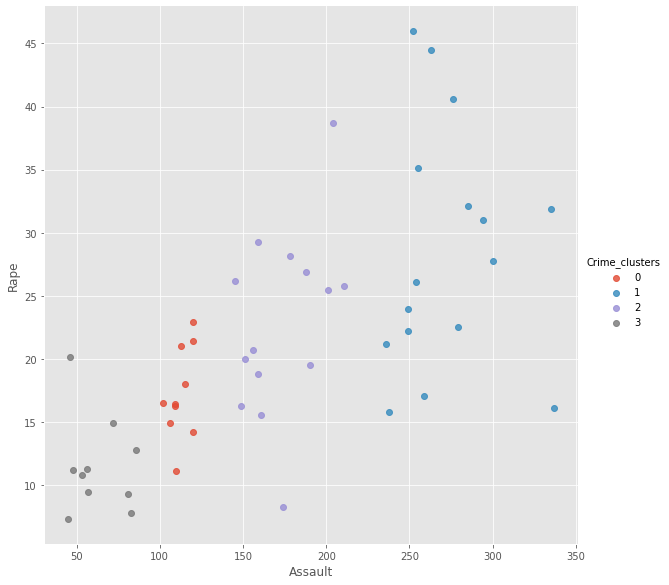

In [30]:
sns.lmplot( 'Assault','Rape',  data=data,
        hue = 'Crime_clusters',
        fit_reg=False, size = 8 );

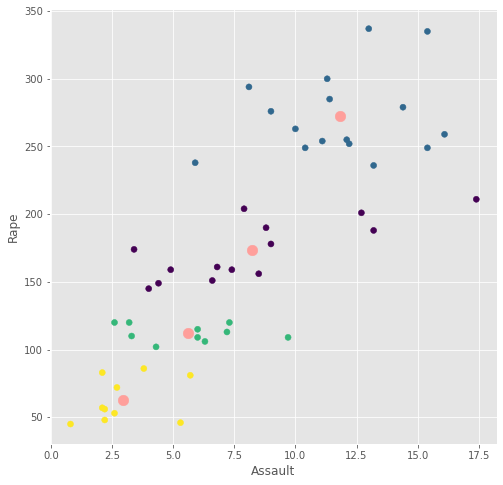

In [31]:
# And same thing using Matplotlib to show also the cluster centers as x:s.

#dt=X
#clusters = KMeans(4);
#clusters.fit(X);
fig, ax = plt.subplots(figsize=(8, 8))

cmap = plt.cm.get_cmap("Spectral")
labels_p = pd.Series(clusters.labels_)

centers = np.array(clusters.cluster_centers_)
plt.scatter(centers[:,0], centers[:,1], marker="o", color='r', s=111)
plt.scatter(dt.iloc[:,0],dt.iloc[:,1], c= labels_p); 

ax.set(ylabel="Rape",
       xlabel="Assault");

As with murder and assault, also rates of rape and assault show clearer correlations.
<br> Perhaps a quick correlation analysis will confirm the assumptions from these visual comparisons:

# Correlations

In [32]:
vars_corr = data[['Murder', 'Assault', 'Rape', 'UrbanPop']]
vars_corr.corr() 

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,0.801873,0.563579,0.069573
Assault,0.801873,1.000000,0.665241,0.258872
Rape,0.563579,0.665241,1.000000,0.411341
UrbanPop,0.069573,0.258872,0.411341,1.000000


This is interesting! The table quite well confirms the assumptions regarding variable correlations indicated also by the graphs. For example, murder and assault have the highest correlations, whereas the size of urban population is not significant. 

# Sort the data according to the four clusters.

In [33]:
stats = data.sort_values("Total", ascending=True)
df_total= pd.DataFrame(stats)

df_total.head(2)

,State,Murder,Assault,UrbanPop,Rape,Total,Crime_clusters
33,North Dakota,0.8,45,44,7.3,53.1,3
44,Vermont,2.2,48,32,11.2,61.4,3


## Cluster 1

In [34]:
df_total[df_total['Crime_clusters'] == 0].sort_values(["UrbanPop"], ascending=True)['State']

16        Kentucky
25         Montana
11           Idaho
26        Nebraska
13         Indiana
15          Kansas
37    Pennsylvania
34            Ohio
6      Connecticut
43            Utah
Name: State, dtype: object

**Cluster 1:** Kentucky, Montana,...,Connecticut, Utah

## Cluster 2

In [35]:
df_total[df_total['Crime_clusters'] == 1].sort_values(["UrbanPop"], ascending=True)['State']

23       Mississippi
32    North Carolina
39    South Carolina
1             Alaska
0            Alabama
17         Louisiana
19          Maryland
30        New Mexico
7           Delaware
21          Michigan
2            Arizona
8            Florida
27            Nevada
12          Illinois
31          New York
4         California
Name: State, dtype: object

**Cluster 2:** Missisippi, North Carolina,...,New York, California<br>

## Cluster 3

In [36]:
df_total[df_total['Crime_clusters'] == 2].sort_values(["UrbanPop"], ascending=True)['State']

3          Arkansas
41        Tennessee
49          Wyoming
9           Georgia
45         Virginia
36           Oregon
35         Oklahoma
24         Missouri
46       Washington
5          Colorado
42            Texas
20    Massachusetts
38     Rhode Island
29       New Jersey
Name: State, dtype: object

**Cluster 3:** Arkansas, Tennessee,...,Rhode Island, New Jersey<br>

## Cluster 4

In [37]:
df_total[df_total['Crime_clusters'] == 3].sort_values(["UrbanPop"], ascending=True)['State']

44          Vermont
47    West Virginia
33     North Dakota
40     South Dakota
18            Maine
28    New Hampshire
14             Iowa
48        Wisconsin
22        Minnesota
10           Hawaii
Name: State, dtype: object

**Cluster 4:** Vermont, West Virginia,...,Wisconsin, Hawaii<br>

## Visualizating clusters

In [38]:
#stats = data.sort_values("Total", ascending=True)
#df_total= pd.DataFrame(stats)

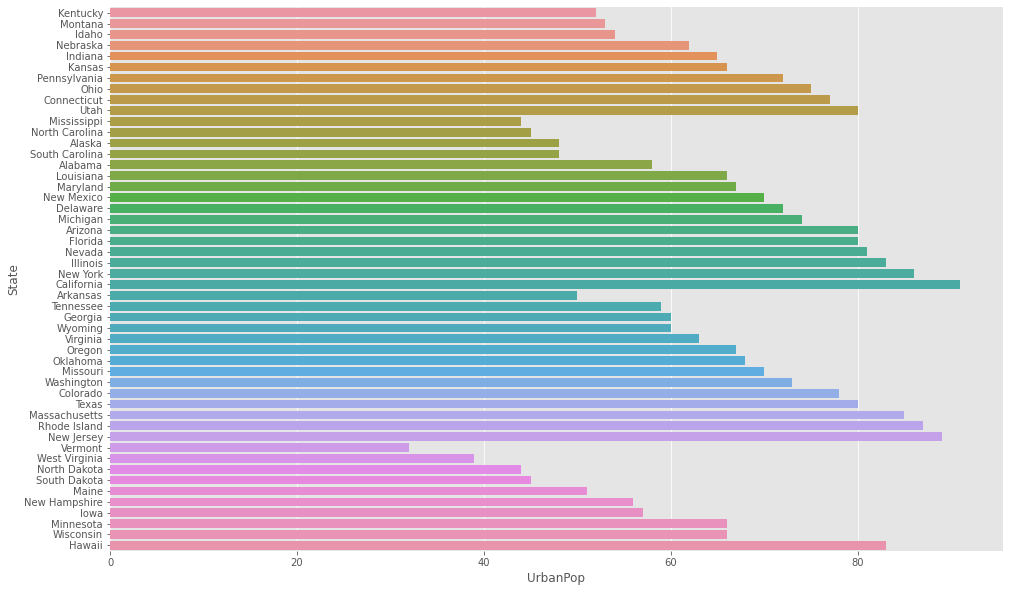

In [46]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(16, 10))

# Load the dataset
stats = data.sort_values([ "Crime_clusters", "UrbanPop"], ascending=True)
sns.set_color_codes("pastel")
sns.barplot(y="State", x="UrbanPop", data=stats)

sns.despine(left=True, bottom=True)

In [79]:
for k in list(range(4)):
    print( "k : ", k+1, " ---> mean : ", (stats[stats["Crime_clusters"] == k]["Total"]).mean()  )
    print( 11*" ", "UrbanPop mean : ", (stats[stats["Crime_clusters"] == k]["UrbanPop"]).mean()  )

k :  1  ---> mean :  135.26
            UrbanPop mean :  65.6
k :  2  ---> mean :  312.74999999999994
            UrbanPop mean :  68.3125
k :  3  ---> mean :  204.3428571428571
            UrbanPop mean :  70.64285714285714
k :  4  ---> mean :  77.16
            UrbanPop mean :  53.9


There are 4 clusters with different total crimes
cluster 2 with the max of crimes
cluster 4 with the min of crimes

In [80]:
# END